PORTADA


> ## <font color ='red'>Tarea
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

## <font color ='mediumpurple'>DEMOSTRACIÓN:

$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
$$P(k + 1)=\frac{e^{-\lambda}(\lambda)^{k+1}}{(k+1)!}$$
$$P(k + 1)=\frac{e^{-\lambda}(\lambda)^{k}\lambda}{(k+1)k!}$$
$$P(k + 1)=\frac{\lambda}{(k+1)} P(k,\lambda) $$

# Tarea 
Partiendo que se desea generar variables aleatorias para la siguiente función de densidad
$$f(x)=30(x^2-2x^3+x^4)$$
Responda los siguientes literales:
1. Usar como función que mayora a $f(x)$ a $t(x)=a \sin(\pi x)$ donde a es el máximo de la función $f(x)$ y graficarlas en una misma gráfica, para validar que en realidad si cumple la condición $t(x)\geq f(x)$.


In [4]:
from scipy.stats import erlang
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook
%matplotlib inline

Funciones, punto máximo: [1.875]


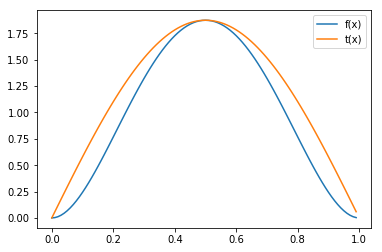

In [5]:
# Función objetivo 
f = lambda x:30*(x**2-2*x**3+x**4)
# Máximo de la función f
max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False)) #AQUI PONGO LA FUNCION QUE A LA QUE QUIERO MAXIMIZAR, SE QUEDA
#EL NEGATIVO PORQUE ES .MIN Y NEGATIVO Y NEGATIVO DA POSITIVO
# Función t -> Función constante
t = lambda x: max_f*np.sin(np.pi*x) # función constante

x = np.arange(0,1,0.01)  # Rango donde se graficará las funciones
print('Funciones, punto máximo:',max_f)
# Gráficas de las funciones
plt.plot(x,f(x),label='f(x)')
plt.plot(x,t(x),label='t(x)')
plt.legend()
plt.show()


2. Encontrar la función de densidad $g(x)$ según lo visto en clase. Reportar todos los cálculos realizados para encontrar dicha función usando Markdown (Latex).



$$g(x)=\frac{t(x)}{c}$$
$$f(x)=30(x^2-2x^3+x^4)$$
$$t(x)=a \sin(\pi x)$$
Como el podemos ver en la gráfica los puntos máximos son los mismos en $g(x)$ y $t(x)$ por lo que podemos decir que ....
$$max(t(x))=max(f(x))$$
$$a=c$$
$$g(x)=\frac{a \sin(\pi x)}{c}$$
Se eliminan a y c porque son iguales
$$g(x)=\sin(\pi x)$$


3. Usar la función encontrada en el punto 2 y utilizar el método de la transformada inversa visto en la clase 9, para generar variables aleatorias que sigan la distribución $g(x)$. **Nota:** Recuerde que el método de la transformada inversa funciona con la distribución de probabilidad acumulada y no con su densidad. Nuevamente similar al punto anterior reportar todos los cálculos usando Markdown (Latex). 


$$g(x)=\frac{t(x)}{c}$$
$$f(x)=30(x^2-2x^3+x^4)$$
$$t(x)=a \sin(\pi x)$$

$$a=max(f(x))$$

$$c=\int_{0}^{1}a sin(\pi x)dx$$
Sacando a
$$c=max(f(x))\int_{0}^{1} sin(\pi x)dx$$
$$c= max(f(x))* [-\frac{cos(\pi y)}{\pi} ]_{0}^{1} = \frac{2}{\pi}max(f(x))$$

$$g(x)=\frac{t(x)}{c}=\frac{max(f(x)) \sin(\pi x)}{\frac{2}{\pi}max(f(x))}=\frac{\pi sin(\pi x)}{2}$$


4. Según el punto 3, generar 10000 puntos aleatorios que sigan la distribución $g(x)$ y comparar con su histograma para validar que los puntos generados siguen la distribución deseada. El resultado debe ser como sigue:
![imagen.png](attachment:imagen.png)

In [10]:
import scipy.optimize as opt
import math

In [11]:
def m_alea(N):
    u =np.random.uniform(0,2/np.pi,N)#esto es por un ciclo completo 2pi
    y=list(map(lambda x: (1/np.pi)*np.arccos(1-np.pi*u[x]),range(N)))
    return y

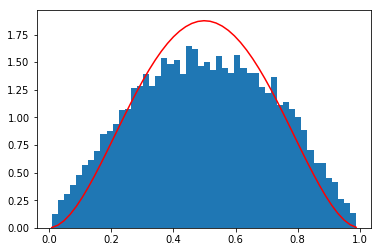

In [14]:
N = 10**4
def plot_hist(N):
    r1=m_alea(N)
    y,x,_=plt.hist(r1, bins=50,density=True)
    y2 =  30*(x**2-2*x**3+x**4) #-(1/np.pi)*(np.cos(np.pi*x))+(1/np.pi)
    plt.plot(x,y2,'r-')
    plt.show()                    #(1/np.pi)*np.arccos(1-np.pi*u[x]),range(N)))

plot_hist(N)

ya hice la grafica del punto 3 marilu 

In [ ]:
# Validación del método
N = 200 # número de puntos a simular
# Como estoy tomando t(x) constante solo es necesario generar valores aleatorios U~(0,1)
R2 = np.random.rand(N)
R1 = np.random.rand(N)

Acep_rechazo(R2,R1,f,t)

In [ ]:
cambio 